In [ ]:
# Setup Env 
# conda create -n titanicsurvivalprediction python=3.8
#conda activate titanicsurvivalprediction

In [123]:
import pandas as pd

In [124]:
df=pd.read_csv('train.csv',na_values='NA')

In [125]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [127]:
dataset=df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]

In [128]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [129]:
print(dataset['Sex'].unique())
print(dataset['Parch'].unique())
print(dataset['Embarked'].unique())

['male' 'female']
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]


In [130]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [131]:
len(dataset)

891

In [132]:
dataset.drop(['Cabin'],axis=1,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\4045770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['Cabin'],axis=1,inplace=True)


In [133]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [134]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [135]:
dataset[dataset['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [136]:
mean_Adult=df.loc[~(df['SibSp'].isnull()) & (df['SibSp']==0) & (df['Parch']==0),'Age'].median()
mean_Child=df.loc[~(df['SibSp'].isnull()) & (df['SibSp']>0) | (df['Parch']>0),'Age'].median()

In [137]:
print("Mean of Adult is {} and Child is {}".format(mean_Adult,mean_Child))

Mean of Adult is 29.5 and Child is 26.0


In [138]:
dataset.loc[df['Age'].isnull() & (df['SibSp']==0) & (df['Parch']==0),'Age']=mean_Child

In [139]:
dataset.loc[df['Age'].isnull() & (df['SibSp']>0) | (df['Parch']>0),'Age']=mean_Adult

In [140]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [141]:
len(dataset)

891

In [142]:
dataset.dropna(inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\2639109627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


In [143]:
len(dataset)

889

In [144]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [145]:
dataset.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,0.008024,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.321150,0.081656,0.016824,-0.548193
Age,0.008024,-0.321150,1.000000,-0.013620,-0.048361,0.075664
SibSp,-0.034040,0.081656,-0.013620,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.048361,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.075664,0.160887,0.217532,1.000000


In [146]:
unique_Embarked=list(dataset['Embarked'].unique())
dataset['Embarked']=dataset['Embarked'].map(lambda x : unique_Embarked.index(x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\612892007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Embarked']=dataset['Embarked'].map(lambda x : unique_Embarked.index(x))


In [147]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,1


In [148]:
unique_Sex=list(dataset['Sex'].unique())
unique_Sex

['male', 'female']

In [149]:
dataset['Sex']=dataset['Sex'].map(lambda x : unique_Sex.index(x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\612398926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sex']=dataset['Sex'].map(lambda x : unique_Sex.index(x))


In [150]:
dataset['FamilyCount']=1+dataset['SibSp'] + dataset['Parch']
dataset.drop(['Parch','SibSp'],axis=1,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\3574618899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['FamilyCount']=1+dataset['SibSp'] + dataset['Parch']
C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\3574618899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['Parch','SibSp'],axis=1,inplace=True)


In [151]:
dataset['Age']=dataset['Age'].map(lambda x : int(x/20))

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\2509635648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age']=dataset['Age'].map(lambda x : int(x/20))


In [152]:
dataset['Age']

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    0
888    1
889    1
890    1
Name: Age, Length: 889, dtype: int64

In [153]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [154]:
len(X)

889

In [155]:
len(y)

889

In [156]:
X['Age'].unique()

array([1, 2, 0, 3, 4], dtype=int64)

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

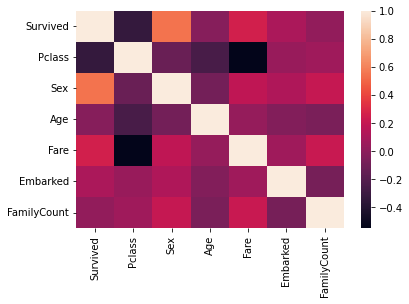

In [158]:
sns.heatmap(dataset.corr())

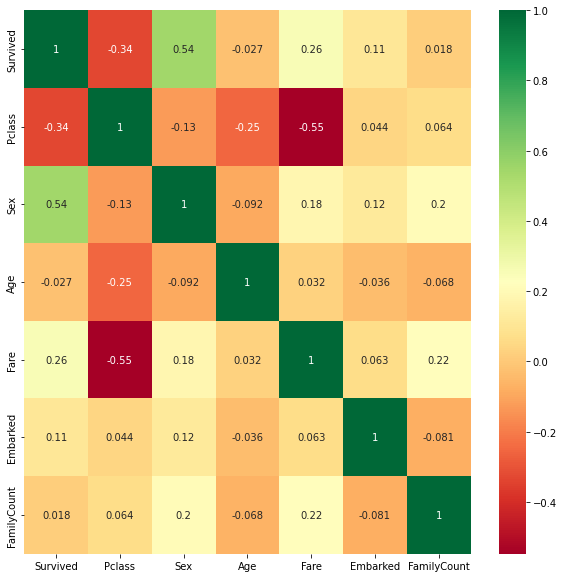

In [159]:
corrmat=dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [162]:
len(X_train)

666

In [163]:
len(X_test)

223

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [165]:
def model(train_data_X,train_data_y):
    
    model = Sequential()
    model.add(Dense(64, input_shape=(len(train_data_X.columns),), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [166]:
base_model=model(X_train,y_train)

In [168]:
base_model.fit(X_train,y_train,epochs=10000,batch_size=30)

Epoch 1/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8604
Epoch 2/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8664
Epoch 3/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8679
Epoch 4/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8694
Epoch 5/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8589
Epoch 6/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8694
Epoch 7/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8589
Epoch 8/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8679
Epoch 9/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.8724
Epoch 10/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3530 - accura

23/23 [==============================] - 0s 5ms/step - loss: 0.3351 - accuracy: 0.8694
Epoch 82/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3458 - accuracy: 0.8694
Epoch 83/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3505 - accuracy: 0.8694
Epoch 84/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.8754
Epoch 85/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3518 - accuracy: 0.8664
Epoch 86/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.8799
Epoch 87/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3489 - accuracy: 0.8619
Epoch 88/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3414 - accuracy: 0.8559
Epoch 89/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3420 - accuracy: 0.8634
Epoch 90/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3408 - accuracy: 0.

23/23 [==============================] - 0s 5ms/step - loss: 0.3330 - accuracy: 0.8769
Epoch 161/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3523 - accuracy: 0.8724
Epoch 162/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3379 - accuracy: 0.8679
Epoch 163/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3301 - accuracy: 0.8769
Epoch 164/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3416 - accuracy: 0.8664
Epoch 165/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3397 - accuracy: 0.8724
Epoch 166/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.8754
Epoch 167/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8709
Epoch 168/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.8769
Epoch 169/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3379 - acc

23/23 [==============================] - 0s 5ms/step - loss: 0.3478 - accuracy: 0.8619
Epoch 240/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3251 - accuracy: 0.8709
Epoch 241/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8694
Epoch 242/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.8784
Epoch 243/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 0.8619
Epoch 244/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3263 - accuracy: 0.8754
Epoch 245/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3353 - accuracy: 0.8679
Epoch 246/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3380 - accuracy: 0.8694
Epoch 247/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3392 - accuracy: 0.8709
Epoch 248/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3243 - acc

23/23 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.8724
Epoch 319/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3302 - accuracy: 0.8634
Epoch 320/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3279 - accuracy: 0.8754
Epoch 321/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8739
Epoch 322/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8889
Epoch 323/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8769
Epoch 324/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3310 - accuracy: 0.8709
Epoch 325/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3290 - accuracy: 0.8784
Epoch 326/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8784
Epoch 327/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3204 - acc

23/23 [==============================] - 0s 5ms/step - loss: 0.3326 - accuracy: 0.8724
Epoch 398/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3325 - accuracy: 0.8754
Epoch 399/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3478 - accuracy: 0.8664
Epoch 400/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3243 - accuracy: 0.8814
Epoch 401/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3398 - accuracy: 0.8754
Epoch 402/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3383 - accuracy: 0.8709
Epoch 403/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3416 - accuracy: 0.8784
Epoch 404/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3351 - accuracy: 0.8724
Epoch 405/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3361 - accuracy: 0.8724
Epoch 406/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3309 - acc

23/23 [==============================] - 0s 5ms/step - loss: 0.3426 - accuracy: 0.8709
Epoch 477/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3267 - accuracy: 0.8829
Epoch 478/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.8694
Epoch 479/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8769
Epoch 480/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3289 - accuracy: 0.8724
Epoch 481/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3347 - accuracy: 0.8724
Epoch 482/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3332 - accuracy: 0.8739
Epoch 483/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3345 - accuracy: 0.8859
Epoch 484/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.8754
Epoch 485/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3435 - acc

23/23 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.8784
Epoch 556/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.8709
Epoch 557/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3320 - accuracy: 0.8769
Epoch 558/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.8769
Epoch 559/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3294 - accuracy: 0.8829
Epoch 560/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3430 - accuracy: 0.8724
Epoch 561/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3200 - accuracy: 0.8859
Epoch 562/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3337 - accuracy: 0.8724
Epoch 563/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3420 - accuracy: 0.8694
Epoch 564/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3295 - acc

23/23 [==============================] - 0s 5ms/step - loss: 0.3226 - accuracy: 0.8799
Epoch 635/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3537 - accuracy: 0.8679
Epoch 636/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3240 - accuracy: 0.8859
Epoch 637/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3218 - accuracy: 0.8739
Epoch 638/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3335 - accuracy: 0.8769
Epoch 639/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3286 - accuracy: 0.8709
Epoch 640/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3225 - accuracy: 0.8784
Epoch 641/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3286 - accuracy: 0.8724
Epoch 642/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3200 - accuracy: 0.8784
Epoch 643/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3311 - acc

23/23 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.8844
Epoch 714/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3256 - accuracy: 0.8679
Epoch 715/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3358 - accuracy: 0.8829
Epoch 716/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3253 - accuracy: 0.8799
Epoch 717/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3173 - accuracy: 0.8829
Epoch 718/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3335 - accuracy: 0.8784
Epoch 719/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3245 - accuracy: 0.8784
Epoch 720/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.8844
Epoch 721/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3275 - accuracy: 0.8799
Epoch 722/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3428 - acc

23/23 [==============================] - 0s 4ms/step - loss: 0.3166 - accuracy: 0.8769
Epoch 793/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3222 - accuracy: 0.8769
Epoch 794/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3221 - accuracy: 0.8784
Epoch 795/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.8694
Epoch 796/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8754
Epoch 797/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3270 - accuracy: 0.8829
Epoch 798/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8769
Epoch 799/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3332 - accuracy: 0.8844
Epoch 800/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3177 - accuracy: 0.8844
Epoch 801/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3489 - acc

23/23 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.8754
Epoch 872/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy: 0.8724
Epoch 873/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.8769
Epoch 874/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3276 - accuracy: 0.8739
Epoch 875/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3281 - accuracy: 0.8784
Epoch 876/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3212 - accuracy: 0.8799
Epoch 877/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3168 - accuracy: 0.8859
Epoch 878/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3231 - accuracy: 0.8724
Epoch 879/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3240 - accuracy: 0.8784
Epoch 880/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3217 - acc

23/23 [==============================] - 0s 5ms/step - loss: 0.3222 - accuracy: 0.8814
Epoch 951/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3280 - accuracy: 0.8724
Epoch 952/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3263 - accuracy: 0.8739
Epoch 953/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3247 - accuracy: 0.8814
Epoch 954/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.8784
Epoch 955/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8799
Epoch 956/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3295 - accuracy: 0.8754
Epoch 957/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3203 - accuracy: 0.8769
Epoch 958/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.8844
Epoch 959/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3194 - acc

23/23 [==============================] - 0s 5ms/step - loss: 0.3198 - accuracy: 0.8754
Epoch 1030/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3217 - accuracy: 0.8769
Epoch 1031/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.8859
Epoch 1032/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3274 - accuracy: 0.8814
Epoch 1033/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3267 - accuracy: 0.8829
Epoch 1034/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3244 - accuracy: 0.8784
Epoch 1035/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3359 - accuracy: 0.8724
Epoch 1036/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.8844
Epoch 1037/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3181 - accuracy: 0.8859
Epoch 1038/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3176 - accuracy: 0.8829
Epoch 1108/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3562 - accuracy: 0.8634
Epoch 1109/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3168 - accuracy: 0.8799
Epoch 1110/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3255 - accuracy: 0.8724
Epoch 1111/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.8859
Epoch 1112/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.8829
Epoch 1113/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3215 - accuracy: 0.8859
Epoch 1114/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3281 - accuracy: 0.8769
Epoch 1115/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3191 - accuracy: 0.8694
Epoch 1116/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3137 - accuracy: 0.8844
Epoch 1186/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3449 - accuracy: 0.8664
Epoch 1187/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.8844
Epoch 1188/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3197 - accuracy: 0.8799
Epoch 1189/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.8739
Epoch 1190/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3248 - accuracy: 0.8784
Epoch 1191/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.8799
Epoch 1192/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3323 - accuracy: 0.8679
Epoch 1193/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.8829
Epoch 1194/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3325 - accuracy: 0.8859
Epoch 1264/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3146 - accuracy: 0.8829
Epoch 1265/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.8829
Epoch 1266/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3167 - accuracy: 0.8814
Epoch 1267/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3234 - accuracy: 0.8799
Epoch 1268/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3227 - accuracy: 0.8784
Epoch 1269/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3278 - accuracy: 0.8784
Epoch 1270/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3100 - accuracy: 0.8829
Epoch 1271/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3463 - accuracy: 0.8739
Epoch 1272/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3444 - accuracy: 0.8829
Epoch 1342/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.8859
Epoch 1343/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8814
Epoch 1344/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3247 - accuracy: 0.8814
Epoch 1345/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.8799
Epoch 1346/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3164 - accuracy: 0.8829
Epoch 1347/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3535 - accuracy: 0.8799
Epoch 1348/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8844
Epoch 1349/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3194 - accuracy: 0.8859
Epoch 1350/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3331 - accuracy: 0.8844
Epoch 1420/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.8874
Epoch 1421/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3290 - accuracy: 0.8799
Epoch 1422/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.8844
Epoch 1423/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3189 - accuracy: 0.8814
Epoch 1424/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.8844
Epoch 1425/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.8889
Epoch 1426/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3130 - accuracy: 0.8829
Epoch 1427/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.8724
Epoch 1428/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3367 - accuracy: 0.8874
Epoch 1498/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3316 - accuracy: 0.8784
Epoch 1499/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.8844
Epoch 1500/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3175 - accuracy: 0.8769
Epoch 1501/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3157 - accuracy: 0.8829
Epoch 1502/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3063 - accuracy: 0.8874
Epoch 1503/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.8829
Epoch 1504/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3092 - accuracy: 0.8799
Epoch 1505/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3371 - accuracy: 0.8829
Epoch 1506/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3131 - accuracy: 0.8859
Epoch 1576/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3067 - accuracy: 0.8919
Epoch 1577/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8784
Epoch 1578/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8784
Epoch 1579/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.8874
Epoch 1580/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.8799
Epoch 1581/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3063 - accuracy: 0.8874
Epoch 1582/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 0.8829
Epoch 1583/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8769
Epoch 1584/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.8844
Epoch 1654/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3121 - accuracy: 0.8859
Epoch 1655/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.8859
Epoch 1656/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3258 - accuracy: 0.8829
Epoch 1657/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.8889
Epoch 1658/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.8784
Epoch 1659/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3096 - accuracy: 0.8874
Epoch 1660/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3286 - accuracy: 0.8784
Epoch 1661/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.8859
Epoch 1662/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.8844
Epoch 1732/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.8829
Epoch 1733/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3155 - accuracy: 0.8859
Epoch 1734/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3353 - accuracy: 0.8859
Epoch 1735/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3035 - accuracy: 0.8889
Epoch 1736/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3254 - accuracy: 0.8829
Epoch 1737/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.8829
Epoch 1738/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3103 - accuracy: 0.8814
Epoch 1739/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3372 - accuracy: 0.8859
Epoch 1740/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.8829
Epoch 1810/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3045 - accuracy: 0.8844
Epoch 1811/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3124 - accuracy: 0.8829
Epoch 1812/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3033 - accuracy: 0.8934
Epoch 1813/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3288 - accuracy: 0.8799
Epoch 1814/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8829
Epoch 1815/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.8859
Epoch 1816/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3358 - accuracy: 0.8919
Epoch 1817/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3049 - accuracy: 0.8859
Epoch 1818/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3058 - accuracy: 0.8889
Epoch 1888/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3493 - accuracy: 0.8769
Epoch 1889/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3258 - accuracy: 0.8859
Epoch 1890/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3602 - accuracy: 0.8844
Epoch 1891/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.8844
Epoch 1892/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3108 - accuracy: 0.8859
Epoch 1893/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3107 - accuracy: 0.8814
Epoch 1894/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3202 - accuracy: 0.8829
Epoch 1895/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.8739
Epoch 1896/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8844
Epoch 1966/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3374 - accuracy: 0.8814
Epoch 1967/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3065 - accuracy: 0.8874
Epoch 1968/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.8859
Epoch 1969/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3379 - accuracy: 0.8799
Epoch 1970/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3067 - accuracy: 0.8859
Epoch 1971/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3085 - accuracy: 0.8844
Epoch 1972/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.8784
Epoch 1973/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3160 - accuracy: 0.8919
Epoch 1974/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3087 - accuracy: 0.8874
Epoch 2044/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3185 - accuracy: 0.8859
Epoch 2045/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3074 - accuracy: 0.8844
Epoch 2046/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3070 - accuracy: 0.8889
Epoch 2047/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3199 - accuracy: 0.8784
Epoch 2048/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.8754
Epoch 2049/10000
23/23 [==============================] - 0s 7ms/step - loss: 0.3142 - accuracy: 0.8829
Epoch 2050/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3031 - accuracy: 0.8889
Epoch 2051/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3951 - accuracy: 0.8724
Epoch 2052/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8784
Epoch 2122/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8889
Epoch 2123/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3033 - accuracy: 0.8844
Epoch 2124/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8784
Epoch 2125/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8814
Epoch 2126/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3084 - accuracy: 0.8799
Epoch 2127/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3127 - accuracy: 0.8799
Epoch 2128/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3201 - accuracy: 0.8844
Epoch 2129/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3201 - accuracy: 0.8739
Epoch 2130/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3296 - accuracy: 0.8814
Epoch 2200/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3225 - accuracy: 0.8844
Epoch 2201/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3018 - accuracy: 0.8829
Epoch 2202/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.8739
Epoch 2203/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3233 - accuracy: 0.8814
Epoch 2204/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3247 - accuracy: 0.8769
Epoch 2205/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3438 - accuracy: 0.8859
Epoch 2206/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3150 - accuracy: 0.8799
Epoch 2207/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3086 - accuracy: 0.8889
Epoch 2208/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3085 - accuracy: 0.8889
Epoch 2278/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3096 - accuracy: 0.8829
Epoch 2279/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8829
Epoch 2280/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3050 - accuracy: 0.8904
Epoch 2281/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8889
Epoch 2282/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.8904
Epoch 2283/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8724
Epoch 2284/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8859
Epoch 2285/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8799
Epoch 2286/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8829
Epoch 2356/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3242 - accuracy: 0.8844
Epoch 2357/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3156 - accuracy: 0.8874
Epoch 2358/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3301 - accuracy: 0.8799
Epoch 2359/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3649 - accuracy: 0.8784
Epoch 2360/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3125 - accuracy: 0.8814
Epoch 2361/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.8859
Epoch 2362/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3078 - accuracy: 0.8889
Epoch 2363/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.8799
Epoch 2364/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 0.8859
Epoch 2434/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3098 - accuracy: 0.8799
Epoch 2435/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3115 - accuracy: 0.8844
Epoch 2436/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3082 - accuracy: 0.8784
Epoch 2437/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3267 - accuracy: 0.8829
Epoch 2438/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3166 - accuracy: 0.8859
Epoch 2439/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3007 - accuracy: 0.8874
Epoch 2440/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3258 - accuracy: 0.8799
Epoch 2441/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.8739
Epoch 2442/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3117 - accuracy: 0.8829
Epoch 2512/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3185 - accuracy: 0.8754
Epoch 2513/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3118 - accuracy: 0.8829
Epoch 2514/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3253 - accuracy: 0.8904
Epoch 2515/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3117 - accuracy: 0.8844
Epoch 2516/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3079 - accuracy: 0.8859
Epoch 2517/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3249 - accuracy: 0.8784
Epoch 2518/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8889
Epoch 2519/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8829
Epoch 2520/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3131 - accuracy: 0.8874
Epoch 2590/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8859
Epoch 2591/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3417 - accuracy: 0.8799
Epoch 2592/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3087 - accuracy: 0.8844
Epoch 2593/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.8814
Epoch 2594/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.8844
Epoch 2595/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3319 - accuracy: 0.8784
Epoch 2596/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3089 - accuracy: 0.8874
Epoch 2597/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3036 - accuracy: 0.8889
Epoch 2598/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3176 - accuracy: 0.8799
Epoch 2668/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.8784
Epoch 2669/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.8919
Epoch 2670/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3245 - accuracy: 0.8769
Epoch 2671/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3214 - accuracy: 0.8829
Epoch 2672/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3169 - accuracy: 0.8829
Epoch 2673/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3367 - accuracy: 0.8709
Epoch 2674/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3094 - accuracy: 0.8829
Epoch 2675/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3100 - accuracy: 0.8904
Epoch 2676/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.8874
Epoch 2746/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3254 - accuracy: 0.8829
Epoch 2747/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3084 - accuracy: 0.8844
Epoch 2748/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.8889
Epoch 2749/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.8739
Epoch 2750/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.8859
Epoch 2751/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3048 - accuracy: 0.8904
Epoch 2752/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.8889
Epoch 2753/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3091 - accuracy: 0.8919
Epoch 2754/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3312 - accuracy: 0.8814
Epoch 2824/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3055 - accuracy: 0.8859
Epoch 2825/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3075 - accuracy: 0.8859
Epoch 2826/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3367 - accuracy: 0.8739
Epoch 2827/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3126 - accuracy: 0.8799
Epoch 2828/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3045 - accuracy: 0.8889
Epoch 2829/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3229 - accuracy: 0.8844
Epoch 2830/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8799
Epoch 2831/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3053 - accuracy: 0.8874
Epoch 2832/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3156 - accuracy: 0.8829
Epoch 2902/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3299 - accuracy: 0.8709
Epoch 2903/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.8889
Epoch 2904/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8814
Epoch 2905/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3161 - accuracy: 0.8889
Epoch 2906/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3036 - accuracy: 0.8844
Epoch 2907/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3844 - accuracy: 0.8784
Epoch 2908/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3332 - accuracy: 0.8844
Epoch 2909/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3106 - accuracy: 0.8874
Epoch 2910/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.8844
Epoch 2980/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3067 - accuracy: 0.8784
Epoch 2981/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3244 - accuracy: 0.8769
Epoch 2982/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3136 - accuracy: 0.8829
Epoch 2983/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3342 - accuracy: 0.8754
Epoch 2984/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3007 - accuracy: 0.8829
Epoch 2985/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3100 - accuracy: 0.8844
Epoch 2986/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3107 - accuracy: 0.8844
Epoch 2987/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.8844
Epoch 2988/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3268 - accuracy: 0.8784
Epoch 3058/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3123 - accuracy: 0.8874
Epoch 3059/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3288 - accuracy: 0.8844
Epoch 3060/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.8874
Epoch 3061/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.8934
Epoch 3062/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3320 - accuracy: 0.8754
Epoch 3063/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3118 - accuracy: 0.8859
Epoch 3064/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3282 - accuracy: 0.8739
Epoch 3065/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.8859
Epoch 3066/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.8784
Epoch 3136/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8859
Epoch 3137/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3497 - accuracy: 0.8874
Epoch 3138/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3371 - accuracy: 0.8844
Epoch 3139/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3066 - accuracy: 0.8829
Epoch 3140/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3207 - accuracy: 0.8784
Epoch 3141/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3381 - accuracy: 0.8799
Epoch 3142/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.8919
Epoch 3143/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3089 - accuracy: 0.8904
Epoch 3144/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3214 - accuracy: 0.8799
Epoch 3214/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3388 - accuracy: 0.8784
Epoch 3215/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.8844
Epoch 3216/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3148 - accuracy: 0.8829
Epoch 3217/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3476 - accuracy: 0.8814
Epoch 3218/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3192 - accuracy: 0.8844
Epoch 3219/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3089 - accuracy: 0.8784
Epoch 3220/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.8814
Epoch 3221/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3096 - accuracy: 0.8799
Epoch 3222/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3105 - accuracy: 0.8859
Epoch 3292/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3339 - accuracy: 0.8859
Epoch 3293/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3146 - accuracy: 0.8769
Epoch 3294/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8739
Epoch 3295/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 0.8814
Epoch 3296/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3036 - accuracy: 0.8904
Epoch 3297/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3128 - accuracy: 0.8889
Epoch 3298/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3109 - accuracy: 0.8844
Epoch 3299/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3473 - accuracy: 0.8709
Epoch 3300/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2

23/23 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.8769
Epoch 3370/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3045 - accuracy: 0.8964
Epoch 3371/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3716 - accuracy: 0.8859
Epoch 3372/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3184 - accuracy: 0.8769
Epoch 3373/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3202 - accuracy: 0.8829
Epoch 3374/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3171 - accuracy: 0.8859
Epoch 3375/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3087 - accuracy: 0.8814
Epoch 3376/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3100 - accuracy: 0.8799
Epoch 3377/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3804 - accuracy: 0.8664
Epoch 3378/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3243 - accuracy: 0.8859
Epoch 3448/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.8844
Epoch 3449/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.8844
Epoch 3450/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3174 - accuracy: 0.8829
Epoch 3451/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8769
Epoch 3452/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3189 - accuracy: 0.8739
Epoch 3453/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3223 - accuracy: 0.8784
Epoch 3454/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8814
Epoch 3455/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.8889
Epoch 3456/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8784
Epoch 3526/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8739
Epoch 3527/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8814
Epoch 3528/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3304 - accuracy: 0.8799
Epoch 3529/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3199 - accuracy: 0.8769
Epoch 3530/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3218 - accuracy: 0.8799
Epoch 3531/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3049 - accuracy: 0.8859
Epoch 3532/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8724
Epoch 3533/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3056 - accuracy: 0.8919
Epoch 3534/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3396 - accuracy: 0.8829
Epoch 3604/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3022 - accuracy: 0.8859
Epoch 3605/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3349 - accuracy: 0.8799
Epoch 3606/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3175 - accuracy: 0.8844
Epoch 3607/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.8829
Epoch 3608/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3168 - accuracy: 0.8844
Epoch 3609/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.8754
Epoch 3610/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3326 - accuracy: 0.8814
Epoch 3611/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3305 - accuracy: 0.8814
Epoch 3612/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3032 - accuracy: 0.8844
Epoch 3682/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3124 - accuracy: 0.8799
Epoch 3683/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3300 - accuracy: 0.8844
Epoch 3684/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3156 - accuracy: 0.8829
Epoch 3685/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8934
Epoch 3686/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8739
Epoch 3687/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8739
Epoch 3688/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.8844
Epoch 3689/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8814
Epoch 3690/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.8784
Epoch 3760/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.8859
Epoch 3761/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3236 - accuracy: 0.8799
Epoch 3762/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3187 - accuracy: 0.8859
Epoch 3763/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3350 - accuracy: 0.8739
Epoch 3764/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3015 - accuracy: 0.8814
Epoch 3765/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.8829
Epoch 3766/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3092 - accuracy: 0.8874
Epoch 3767/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3031 - accuracy: 0.8844
Epoch 3768/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8859
Epoch 3838/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8859
Epoch 3839/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8739
Epoch 3840/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8829
Epoch 3841/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.8859
Epoch 3842/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8829
Epoch 3843/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.8919
Epoch 3844/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8919
Epoch 3845/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8814
Epoch 3846/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.8889
Epoch 3916/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8754
Epoch 3917/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3139 - accuracy: 0.8859
Epoch 3918/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8829
Epoch 3919/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8799
Epoch 3920/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3039 - accuracy: 0.8889
Epoch 3921/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3204 - accuracy: 0.8904
Epoch 3922/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.8709
Epoch 3923/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3081 - accuracy: 0.8829
Epoch 3924/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3093 - accuracy: 0.8904
Epoch 3994/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3339 - accuracy: 0.8799
Epoch 3995/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.8799
Epoch 3996/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3080 - accuracy: 0.8919
Epoch 3997/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3173 - accuracy: 0.8814
Epoch 3998/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.8829
Epoch 3999/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3228 - accuracy: 0.8739
Epoch 4000/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3182 - accuracy: 0.8799
Epoch 4001/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3189 - accuracy: 0.8799
Epoch 4002/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3674 - accuracy: 0.8829
Epoch 4072/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3072 - accuracy: 0.8904
Epoch 4073/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3109 - accuracy: 0.8859
Epoch 4074/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.8844
Epoch 4075/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.8814
Epoch 4076/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3429 - accuracy: 0.8799
Epoch 4077/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.8829
Epoch 4078/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.8889
Epoch 4079/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3293 - accuracy: 0.8799
Epoch 4080/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3306 - accuracy: 0.8799
Epoch 4150/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3290 - accuracy: 0.8844
Epoch 4151/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3208 - accuracy: 0.8769
Epoch 4152/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3174 - accuracy: 0.8799
Epoch 4153/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8829
Epoch 4154/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3158 - accuracy: 0.8829
Epoch 4155/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3149 - accuracy: 0.8814
Epoch 4156/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3186 - accuracy: 0.8799
Epoch 4157/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3157 - accuracy: 0.8814
Epoch 4158/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3110 - accuracy: 0.8904
Epoch 4228/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8829
Epoch 4229/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3133 - accuracy: 0.8769
Epoch 4230/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 0.8889
Epoch 4231/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3279 - accuracy: 0.8769
Epoch 4232/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3345 - accuracy: 0.8904
Epoch 4233/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.8874
Epoch 4234/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3338 - accuracy: 0.8724
Epoch 4235/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.8784
Epoch 4236/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3251 - accuracy: 0.8814
Epoch 4306/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.8904
Epoch 4307/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3219 - accuracy: 0.8739
Epoch 4308/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3075 - accuracy: 0.8844
Epoch 4309/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 0.8814
Epoch 4310/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3273 - accuracy: 0.8814
Epoch 4311/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.8829
Epoch 4312/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3110 - accuracy: 0.8844
Epoch 4313/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3149 - accuracy: 0.8784
Epoch 4314/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3186 - accuracy: 0.8889
Epoch 4384/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3155 - accuracy: 0.8874
Epoch 4385/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.8739
Epoch 4386/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3264 - accuracy: 0.8814
Epoch 4387/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3032 - accuracy: 0.8949
Epoch 4388/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3216 - accuracy: 0.8799
Epoch 4389/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3663 - accuracy: 0.8829
Epoch 4390/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3203 - accuracy: 0.8784
Epoch 4391/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3190 - accuracy: 0.8784
Epoch 4392/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 6ms/step - loss: 0.3209 - accuracy: 0.8724
Epoch 4462/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8799
Epoch 4463/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8829
Epoch 4464/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8889
Epoch 4465/10000
23/23 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.8979
Epoch 4466/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8889
Epoch 4467/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3106 - accuracy: 0.8844
Epoch 4468/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.8799
Epoch 4469/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3174 - accuracy: 0.8829
Epoch 4470/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8664
Epoch 4540/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3200 - accuracy: 0.8934
Epoch 4541/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3097 - accuracy: 0.8859
Epoch 4542/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3155 - accuracy: 0.8904
Epoch 4543/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.8889
Epoch 4544/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.8874
Epoch 4545/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8769
Epoch 4546/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.8784
Epoch 4547/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3169 - accuracy: 0.8754
Epoch 4548/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.8859
Epoch 4618/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3096 - accuracy: 0.8814
Epoch 4619/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8679
Epoch 4620/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3352 - accuracy: 0.8694
Epoch 4621/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3095 - accuracy: 0.8859
Epoch 4622/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.8784
Epoch 4623/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3165 - accuracy: 0.8829
Epoch 4624/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3219 - accuracy: 0.8739
Epoch 4625/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3064 - accuracy: 0.8844
Epoch 4626/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3235 - accuracy: 0.8799
Epoch 4696/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3178 - accuracy: 0.8814
Epoch 4697/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.8754
Epoch 4698/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3711 - accuracy: 0.8844
Epoch 4699/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.8799
Epoch 4700/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3252 - accuracy: 0.8709
Epoch 4701/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.8799
Epoch 4702/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.8784
Epoch 4703/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3280 - accuracy: 0.8904
Epoch 4704/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3090 - accuracy: 0.8889
Epoch 4774/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8904
Epoch 4775/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3076 - accuracy: 0.8829
Epoch 4776/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3146 - accuracy: 0.8859
Epoch 4777/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3219 - accuracy: 0.8859
Epoch 4778/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3179 - accuracy: 0.8814
Epoch 4779/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.8859
Epoch 4780/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3082 - accuracy: 0.8904
Epoch 4781/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3072 - accuracy: 0.8814
Epoch 4782/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.8754
Epoch 4852/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.8889
Epoch 4853/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3141 - accuracy: 0.8859
Epoch 4854/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.8769
Epoch 4855/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3402 - accuracy: 0.8829
Epoch 4856/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8844
Epoch 4857/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.8814
Epoch 4858/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.8844
Epoch 4859/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3105 - accuracy: 0.8919
Epoch 4860/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2

23/23 [==============================] - 0s 5ms/step - loss: 0.3118 - accuracy: 0.8799
Epoch 4930/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.8844
Epoch 4931/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3181 - accuracy: 0.8844
Epoch 4932/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3211 - accuracy: 0.8874
Epoch 4933/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3190 - accuracy: 0.8799
Epoch 4934/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.8904
Epoch 4935/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3033 - accuracy: 0.8889
Epoch 4936/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3100 - accuracy: 0.8799
Epoch 4937/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3105 - accuracy: 0.8859
Epoch 4938/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3138 - accuracy: 0.8814
Epoch 5008/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3170 - accuracy: 0.8754
Epoch 5009/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.8814
Epoch 5010/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3131 - accuracy: 0.8874
Epoch 5011/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3164 - accuracy: 0.8829
Epoch 5012/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3058 - accuracy: 0.8934
Epoch 5013/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3035 - accuracy: 0.8859
Epoch 5014/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.8709
Epoch 5015/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3318 - accuracy: 0.8664
Epoch 5016/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.8859
Epoch 5086/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.8829
Epoch 5087/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.8799
Epoch 5088/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.8844
Epoch 5089/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3500 - accuracy: 0.8739
Epoch 5090/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3194 - accuracy: 0.8799
Epoch 5091/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.8769
Epoch 5092/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3166 - accuracy: 0.8874
Epoch 5093/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3259 - accuracy: 0.8739
Epoch 5094/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3255 - accuracy: 0.8844
Epoch 5164/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3244 - accuracy: 0.8844
Epoch 5165/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.8889
Epoch 5166/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3173 - accuracy: 0.8769
Epoch 5167/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3778 - accuracy: 0.8829
Epoch 5168/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8784
Epoch 5169/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3018 - accuracy: 0.8889
Epoch 5170/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.8874
Epoch 5171/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3288 - accuracy: 0.8829
Epoch 5172/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2

23/23 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8799
Epoch 5242/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3284 - accuracy: 0.8814
Epoch 5243/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3169 - accuracy: 0.8829
Epoch 5244/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.8859
Epoch 5245/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3140 - accuracy: 0.8769
Epoch 5246/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3680 - accuracy: 0.8814
Epoch 5247/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3212 - accuracy: 0.8754
Epoch 5248/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.8829
Epoch 5249/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3033 - accuracy: 0.8904
Epoch 5250/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3226 - accuracy: 0.8829
Epoch 5320/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3098 - accuracy: 0.8889
Epoch 5321/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3207 - accuracy: 0.8784
Epoch 5322/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3334 - accuracy: 0.8784
Epoch 5323/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8844
Epoch 5324/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3271 - accuracy: 0.8754
Epoch 5325/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3107 - accuracy: 0.8919
Epoch 5326/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3135 - accuracy: 0.8904
Epoch 5327/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.8874
Epoch 5328/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8859
Epoch 5398/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3011 - accuracy: 0.8904
Epoch 5399/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8799
Epoch 5400/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.8814
Epoch 5401/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.8844
Epoch 5402/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.8859
Epoch 5403/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3245 - accuracy: 0.8709
Epoch 5404/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.8814
Epoch 5405/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3178 - accuracy: 0.8829
Epoch 5406/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3196 - accuracy: 0.8874
Epoch 5476/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3183 - accuracy: 0.8784
Epoch 5477/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8799
Epoch 5478/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3124 - accuracy: 0.8814
Epoch 5479/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3231 - accuracy: 0.8784
Epoch 5480/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8814
Epoch 5481/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3420 - accuracy: 0.8844
Epoch 5482/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.8754
Epoch 5483/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.8829
Epoch 5484/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3370 - accuracy: 0.8784
Epoch 5554/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8829
Epoch 5555/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3181 - accuracy: 0.8844
Epoch 5556/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.8844
Epoch 5557/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3143 - accuracy: 0.8844
Epoch 5558/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.8889
Epoch 5559/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3150 - accuracy: 0.8844
Epoch 5560/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.8473 - accuracy: 0.8859
Epoch 5561/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.8799
Epoch 5562/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.8784
Epoch 5632/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3079 - accuracy: 0.8829
Epoch 5633/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3214 - accuracy: 0.8799
Epoch 5634/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.8859
Epoch 5635/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.8799
Epoch 5636/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3083 - accuracy: 0.8844
Epoch 5637/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3083 - accuracy: 0.8859
Epoch 5638/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8874
Epoch 5639/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3329 - accuracy: 0.8814
Epoch 5640/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3452 - accuracy: 0.8859
Epoch 5710/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3042 - accuracy: 0.8874
Epoch 5711/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.8874
Epoch 5712/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3130 - accuracy: 0.8829
Epoch 5713/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3077 - accuracy: 0.8799
Epoch 5714/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3132 - accuracy: 0.8784
Epoch 5715/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3399 - accuracy: 0.8814
Epoch 5716/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.8859
Epoch 5717/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3014 - accuracy: 0.8934
Epoch 5718/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.8829
Epoch 5788/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.8784
Epoch 5789/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3273 - accuracy: 0.8814
Epoch 5790/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3147 - accuracy: 0.8859
Epoch 5791/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3130 - accuracy: 0.8844
Epoch 5792/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3303 - accuracy: 0.8859
Epoch 5793/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3283 - accuracy: 0.8919
Epoch 5794/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.8904
Epoch 5795/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.8754
Epoch 5796/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.8904
Epoch 5866/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3023 - accuracy: 0.8874
Epoch 5867/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.8859
Epoch 5868/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3573 - accuracy: 0.8784
Epoch 5869/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3082 - accuracy: 0.8814
Epoch 5870/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3105 - accuracy: 0.8799
Epoch 5871/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.8889
Epoch 5872/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3358 - accuracy: 0.8814
Epoch 5873/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3016 - accuracy: 0.8904
Epoch 5874/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.2964 - accuracy: 0.8874
Epoch 5944/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3150 - accuracy: 0.8844
Epoch 5945/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3106 - accuracy: 0.8844
Epoch 5946/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3010 - accuracy: 0.8844
Epoch 5947/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3061 - accuracy: 0.8889
Epoch 5948/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3245 - accuracy: 0.8754
Epoch 5949/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3104 - accuracy: 0.8859
Epoch 5950/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.4873 - accuracy: 0.8844
Epoch 5951/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.8784
Epoch 5952/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.8859
Epoch 6022/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3147 - accuracy: 0.8844
Epoch 6023/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3101 - accuracy: 0.8889
Epoch 6024/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3198 - accuracy: 0.8784
Epoch 6025/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3178 - accuracy: 0.8784
Epoch 6026/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3126 - accuracy: 0.8814
Epoch 6027/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.8724
Epoch 6028/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.8889
Epoch 6029/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3073 - accuracy: 0.8844
Epoch 6030/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3219 - accuracy: 0.8889
Epoch 6100/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.8859
Epoch 6101/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3120 - accuracy: 0.8844
Epoch 6102/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3313 - accuracy: 0.8859
Epoch 6103/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3041 - accuracy: 0.8874
Epoch 6104/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3551 - accuracy: 0.8739
Epoch 6105/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3033 - accuracy: 0.8874
Epoch 6106/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.8904
Epoch 6107/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3269 - accuracy: 0.8844
Epoch 6108/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3110 - accuracy: 0.8784
Epoch 6178/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3159 - accuracy: 0.8874
Epoch 6179/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3096 - accuracy: 0.8814
Epoch 6180/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.8784
Epoch 6181/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3180 - accuracy: 0.8874
Epoch 6182/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3250 - accuracy: 0.8784
Epoch 6183/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3201 - accuracy: 0.8799
Epoch 6184/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8799
Epoch 6185/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3204 - accuracy: 0.8814
Epoch 6186/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3268 - accuracy: 0.8829
Epoch 6256/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.8799
Epoch 6257/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3165 - accuracy: 0.8814
Epoch 6258/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3238 - accuracy: 0.8874
Epoch 6259/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3079 - accuracy: 0.8859
Epoch 6260/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3160 - accuracy: 0.8784
Epoch 6261/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3086 - accuracy: 0.8874
Epoch 6262/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3124 - accuracy: 0.8844
Epoch 6263/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3136 - accuracy: 0.8799
Epoch 6264/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3170 - accuracy: 0.8859
Epoch 6334/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3071 - accuracy: 0.8859
Epoch 6335/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3111 - accuracy: 0.8799
Epoch 6336/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3263 - accuracy: 0.8724
Epoch 6337/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3267 - accuracy: 0.8754
Epoch 6338/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8784
Epoch 6339/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3128 - accuracy: 0.8769
Epoch 6340/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3876 - accuracy: 0.8709
Epoch 6341/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8784
Epoch 6342/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.8889
Epoch 6412/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3195 - accuracy: 0.8784
Epoch 6413/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.8784
Epoch 6414/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3025 - accuracy: 0.8889
Epoch 6415/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3283 - accuracy: 0.8904
Epoch 6416/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.8814
Epoch 6417/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.8904
Epoch 6418/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.8784
Epoch 6419/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3839 - accuracy: 0.8904
Epoch 6420/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3014 - accuracy: 0.8844
Epoch 6490/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3042 - accuracy: 0.8919
Epoch 6491/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3118 - accuracy: 0.8829
Epoch 6492/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2994 - accuracy: 0.8844
Epoch 6493/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3331 - accuracy: 0.8739
Epoch 6494/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3274 - accuracy: 0.8889
Epoch 6495/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3082 - accuracy: 0.8874
Epoch 6496/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3191 - accuracy: 0.8829
Epoch 6497/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3216 - accuracy: 0.8904
Epoch 6498/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3172 - accuracy: 0.8904
Epoch 6568/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3133 - accuracy: 0.8844
Epoch 6569/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3291 - accuracy: 0.8739
Epoch 6570/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.8844
Epoch 6571/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8814
Epoch 6572/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3131 - accuracy: 0.8799
Epoch 6573/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.8739
Epoch 6574/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3129 - accuracy: 0.8859
Epoch 6575/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3109 - accuracy: 0.8859
Epoch 6576/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3096 - accuracy: 0.8889
Epoch 6646/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3165 - accuracy: 0.8799
Epoch 6647/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3320 - accuracy: 0.8784
Epoch 6648/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3042 - accuracy: 0.8904
Epoch 6649/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3209 - accuracy: 0.8769
Epoch 6650/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3054 - accuracy: 0.8829
Epoch 6651/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3094 - accuracy: 0.8904
Epoch 6652/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3081 - accuracy: 0.8829
Epoch 6653/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3188 - accuracy: 0.8844
Epoch 6654/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3565 - accuracy: 0.8724
Epoch 6724/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2995 - accuracy: 0.8904
Epoch 6725/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3063 - accuracy: 0.8829
Epoch 6726/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.8844
Epoch 6727/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3190 - accuracy: 0.8814
Epoch 6728/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2986 - accuracy: 0.8919
Epoch 6729/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.8889
Epoch 6730/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.8874
Epoch 6731/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3185 - accuracy: 0.8829
Epoch 6732/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3087 - accuracy: 0.8874
Epoch 6802/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3069 - accuracy: 0.8904
Epoch 6803/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3204 - accuracy: 0.8889
Epoch 6804/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3048 - accuracy: 0.8889
Epoch 6805/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3222 - accuracy: 0.8724
Epoch 6806/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3078 - accuracy: 0.8904
Epoch 6807/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3012 - accuracy: 0.8874
Epoch 6808/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3201 - accuracy: 0.8859
Epoch 6809/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3043 - accuracy: 0.8934
Epoch 6810/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3116 - accuracy: 0.8874
Epoch 6880/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3298 - accuracy: 0.8784
Epoch 6881/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.8874
Epoch 6882/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8799
Epoch 6883/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.8829
Epoch 6884/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8814
Epoch 6885/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8889
Epoch 6886/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8844
Epoch 6887/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8874
Epoch 6888/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3032 - accuracy: 0.8904
Epoch 6958/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3043 - accuracy: 0.8844
Epoch 6959/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3117 - accuracy: 0.8844
Epoch 6960/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3127 - accuracy: 0.8769
Epoch 6961/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3129 - accuracy: 0.8844
Epoch 6962/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3092 - accuracy: 0.8844
Epoch 6963/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3291 - accuracy: 0.8889
Epoch 6964/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.8859
Epoch 6965/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3178 - accuracy: 0.8754
Epoch 6966/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.8889
Epoch 7036/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3052 - accuracy: 0.8844
Epoch 7037/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3058 - accuracy: 0.8844
Epoch 7038/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3050 - accuracy: 0.8874
Epoch 7039/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3169 - accuracy: 0.8859
Epoch 7040/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3042 - accuracy: 0.8874
Epoch 7041/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8709
Epoch 7042/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3024 - accuracy: 0.8889
Epoch 7043/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3247 - accuracy: 0.8769
Epoch 7044/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.2993 - accuracy: 0.8904
Epoch 7114/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3254 - accuracy: 0.8874
Epoch 7115/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.8844
Epoch 7116/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.8919
Epoch 7117/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.8829
Epoch 7118/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2975 - accuracy: 0.8874
Epoch 7119/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.8829
Epoch 7120/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3038 - accuracy: 0.8874
Epoch 7121/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3153 - accuracy: 0.8844
Epoch 7122/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.2976 - accuracy: 0.8919
Epoch 7192/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3129 - accuracy: 0.8814
Epoch 7193/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.8844
Epoch 7194/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3718 - accuracy: 0.8769
Epoch 7195/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3027 - accuracy: 0.8874
Epoch 7196/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3163 - accuracy: 0.8829
Epoch 7197/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.8859
Epoch 7198/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3029 - accuracy: 0.8844
Epoch 7199/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3172 - accuracy: 0.8859
Epoch 7200/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3049 - accuracy: 0.8784
Epoch 7270/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.8874
Epoch 7271/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3074 - accuracy: 0.8829
Epoch 7272/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3512 - accuracy: 0.8754
Epoch 7273/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.8859
Epoch 7274/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.8859
Epoch 7275/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.8844
Epoch 7276/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3062 - accuracy: 0.8829
Epoch 7277/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3027 - accuracy: 0.8874
Epoch 7278/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8874
Epoch 7348/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3060 - accuracy: 0.8844
Epoch 7349/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.8904
Epoch 7350/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3121 - accuracy: 0.8859
Epoch 7351/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8754
Epoch 7352/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8904
Epoch 7353/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.8874
Epoch 7354/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.8829
Epoch 7355/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3096 - accuracy: 0.8844
Epoch 7356/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3097 - accuracy: 0.8859
Epoch 7426/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3061 - accuracy: 0.8844
Epoch 7427/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.8889
Epoch 7428/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8724
Epoch 7429/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2969 - accuracy: 0.8844
Epoch 7430/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.8754
Epoch 7431/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3049 - accuracy: 0.8889
Epoch 7432/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3106 - accuracy: 0.8769
Epoch 7433/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.8784
Epoch 7434/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3003 - accuracy: 0.8919
Epoch 7504/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3042 - accuracy: 0.8889
Epoch 7505/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3138 - accuracy: 0.8754
Epoch 7506/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2994 - accuracy: 0.8949
Epoch 7507/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8814
Epoch 7508/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3088 - accuracy: 0.8859
Epoch 7509/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.8844
Epoch 7510/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3228 - accuracy: 0.8784
Epoch 7511/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3034 - accuracy: 0.8889
Epoch 7512/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.8949
Epoch 7582/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3074 - accuracy: 0.8829
Epoch 7583/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3177 - accuracy: 0.8844
Epoch 7584/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8829
Epoch 7585/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3060 - accuracy: 0.8844
Epoch 7586/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3187 - accuracy: 0.8904
Epoch 7587/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3106 - accuracy: 0.8859
Epoch 7588/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3065 - accuracy: 0.8904
Epoch 7589/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.8874
Epoch 7590/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3021 - accuracy: 0.8919
Epoch 7660/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3160 - accuracy: 0.8829
Epoch 7661/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.8859
Epoch 7662/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.8859
Epoch 7663/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.3127 - accuracy: 0.8799
Epoch 7664/10000
23/23 [==============================] - 0s 7ms/step - loss: 0.3162 - accuracy: 0.8889
Epoch 7665/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3030 - accuracy: 0.8859
Epoch 7666/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8889
Epoch 7667/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3251 - accuracy: 0.8889
Epoch 7668/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2

23/23 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.8784
Epoch 7738/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3050 - accuracy: 0.8829
Epoch 7739/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.8829
Epoch 7740/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8889
Epoch 7741/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3170 - accuracy: 0.8799
Epoch 7742/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.8904
Epoch 7743/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3105 - accuracy: 0.8874
Epoch 7744/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.8904
Epoch 7745/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3067 - accuracy: 0.8904
Epoch 7746/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.8874
Epoch 7816/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2988 - accuracy: 0.8904
Epoch 7817/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3049 - accuracy: 0.8889
Epoch 7818/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3109 - accuracy: 0.8919
Epoch 7819/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2962 - accuracy: 0.8934
Epoch 7820/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2987 - accuracy: 0.8874
Epoch 7821/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3109 - accuracy: 0.8874
Epoch 7822/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3284 - accuracy: 0.8844
Epoch 7823/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2989 - accuracy: 0.8904
Epoch 7824/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.2940 - accuracy: 0.8949
Epoch 7894/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.8859
Epoch 7895/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3113 - accuracy: 0.8814
Epoch 7896/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3032 - accuracy: 0.8889
Epoch 7897/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3056 - accuracy: 0.8874
Epoch 7898/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3126 - accuracy: 0.8889
Epoch 7899/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3295 - accuracy: 0.8814
Epoch 7900/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.8859
Epoch 7901/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.8844
Epoch 7902/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2

23/23 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8874
Epoch 7972/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2931 - accuracy: 0.9009
Epoch 7973/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3160 - accuracy: 0.8829
Epoch 7974/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3038 - accuracy: 0.8889
Epoch 7975/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3089 - accuracy: 0.8829
Epoch 7976/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3172 - accuracy: 0.8829
Epoch 7977/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3071 - accuracy: 0.8889
Epoch 7978/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2994 - accuracy: 0.8934
Epoch 7979/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.8739
Epoch 7980/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.8889
Epoch 8050/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3211 - accuracy: 0.8739
Epoch 8051/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3066 - accuracy: 0.8844
Epoch 8052/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.8844
Epoch 8053/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3147 - accuracy: 0.8784
Epoch 8054/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3019 - accuracy: 0.8799
Epoch 8055/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3171 - accuracy: 0.8874
Epoch 8056/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3237 - accuracy: 0.8799
Epoch 8057/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3001 - accuracy: 0.8904
Epoch 8058/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.3090 - accuracy: 0.8829
Epoch 8128/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3094 - accuracy: 0.8799
Epoch 8129/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3013 - accuracy: 0.8844
Epoch 8130/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.8769
Epoch 8131/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8889
Epoch 8132/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.8904
Epoch 8133/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3347 - accuracy: 0.8784
Epoch 8134/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3018 - accuracy: 0.8919
Epoch 8135/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8784
Epoch 8136/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.8829
Epoch 8206/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3064 - accuracy: 0.8844
Epoch 8207/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.8874
Epoch 8208/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3033 - accuracy: 0.8889
Epoch 8209/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3027 - accuracy: 0.8814
Epoch 8210/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3000 - accuracy: 0.8859
Epoch 8211/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3143 - accuracy: 0.8889
Epoch 8212/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2957 - accuracy: 0.8889
Epoch 8213/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.8859
Epoch 8214/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.8844
Epoch 8284/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3021 - accuracy: 0.8964
Epoch 8285/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3106 - accuracy: 0.8844
Epoch 8286/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3216 - accuracy: 0.8829
Epoch 8287/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.8844
Epoch 8288/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3056 - accuracy: 0.8844
Epoch 8289/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3002 - accuracy: 0.8844
Epoch 8290/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3104 - accuracy: 0.8874
Epoch 8291/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3250 - accuracy: 0.8874
Epoch 8292/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.8874
Epoch 8362/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2984 - accuracy: 0.8889
Epoch 8363/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3059 - accuracy: 0.8829
Epoch 8364/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3086 - accuracy: 0.8829
Epoch 8365/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.8799
Epoch 8366/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2954 - accuracy: 0.8934
Epoch 8367/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3041 - accuracy: 0.8904
Epoch 8368/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3016 - accuracy: 0.8784
Epoch 8369/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3052 - accuracy: 0.8904
Epoch 8370/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3465 - accuracy: 0.8799
Epoch 8440/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2926 - accuracy: 0.8904
Epoch 8441/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3021 - accuracy: 0.8844
Epoch 8442/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2983 - accuracy: 0.8949
Epoch 8443/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2974 - accuracy: 0.8844
Epoch 8444/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3073 - accuracy: 0.8799
Epoch 8445/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3081 - accuracy: 0.8844
Epoch 8446/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2998 - accuracy: 0.8844
Epoch 8447/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3101 - accuracy: 0.8964
Epoch 8448/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.2926 - accuracy: 0.8979
Epoch 8518/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.8799
Epoch 8519/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.8934
Epoch 8520/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3089 - accuracy: 0.8814
Epoch 8521/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8874
Epoch 8522/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2941 - accuracy: 0.8934
Epoch 8523/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3249 - accuracy: 0.8769
Epoch 8524/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2989 - accuracy: 0.8889
Epoch 8525/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.8829
Epoch 8526/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3129 - accuracy: 0.8799
Epoch 8596/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3053 - accuracy: 0.8859
Epoch 8597/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3037 - accuracy: 0.8829
Epoch 8598/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2959 - accuracy: 0.8949
Epoch 8599/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.8754
Epoch 8600/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3109 - accuracy: 0.8784
Epoch 8601/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3156 - accuracy: 0.8889
Epoch 8602/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2947 - accuracy: 0.8904
Epoch 8603/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3272 - accuracy: 0.8859
Epoch 8604/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2

23/23 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.8859
Epoch 8674/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3144 - accuracy: 0.8889
Epoch 8675/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3033 - accuracy: 0.8889
Epoch 8676/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3016 - accuracy: 0.8859
Epoch 8677/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.8859
Epoch 8678/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3017 - accuracy: 0.8844
Epoch 8679/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3068 - accuracy: 0.8889
Epoch 8680/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.8919
Epoch 8681/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2970 - accuracy: 0.8859
Epoch 8682/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3087 - accuracy: 0.8874
Epoch 8752/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2992 - accuracy: 0.8919
Epoch 8753/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2950 - accuracy: 0.8919
Epoch 8754/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2943 - accuracy: 0.8934
Epoch 8755/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.6617 - accuracy: 0.8769
Epoch 8756/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.8904
Epoch 8757/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.8919
Epoch 8758/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.8844
Epoch 8759/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2983 - accuracy: 0.8904
Epoch 8760/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3098 - accuracy: 0.8829
Epoch 8830/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2931 - accuracy: 0.8889
Epoch 8831/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2966 - accuracy: 0.8919
Epoch 8832/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3052 - accuracy: 0.8799
Epoch 8833/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2982 - accuracy: 0.8889
Epoch 8834/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3011 - accuracy: 0.8784
Epoch 8835/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2884 - accuracy: 0.8994
Epoch 8836/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.8844
Epoch 8837/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.8874
Epoch 8838/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.8859
Epoch 8908/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8814
Epoch 8909/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8844
Epoch 8910/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2912 - accuracy: 0.8979
Epoch 8911/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2964 - accuracy: 0.8934
Epoch 8912/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3002 - accuracy: 0.8904
Epoch 8913/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8799
Epoch 8914/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3028 - accuracy: 0.8844
Epoch 8915/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3602 - accuracy: 0.8919
Epoch 8916/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3154 - accuracy: 0.8784
Epoch 8986/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3125 - accuracy: 0.8904
Epoch 8987/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2923 - accuracy: 0.8949
Epoch 8988/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.8829
Epoch 8989/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3219 - accuracy: 0.8904
Epoch 8990/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.8904
Epoch 8991/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2996 - accuracy: 0.8859
Epoch 8992/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2948 - accuracy: 0.8889
Epoch 8993/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2982 - accuracy: 0.8904
Epoch 8994/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.3051 - accuracy: 0.8874
Epoch 9064/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3018 - accuracy: 0.8859
Epoch 9065/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2917 - accuracy: 0.8889
Epoch 9066/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3072 - accuracy: 0.8874
Epoch 9067/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.8949
Epoch 9068/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.8859
Epoch 9069/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.8889
Epoch 9070/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2964 - accuracy: 0.8949
Epoch 9071/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3122 - accuracy: 0.8829
Epoch 9072/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2

23/23 [==============================] - 0s 4ms/step - loss: 0.2961 - accuracy: 0.8874
Epoch 9142/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3072 - accuracy: 0.8814
Epoch 9143/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3083 - accuracy: 0.8904
Epoch 9144/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8844
Epoch 9145/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3049 - accuracy: 0.8889
Epoch 9146/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2985 - accuracy: 0.8949
Epoch 9147/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 0.8964
Epoch 9148/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.8874
Epoch 9149/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3382 - accuracy: 0.8769
Epoch 9150/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.8889
Epoch 9220/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2944 - accuracy: 0.8964
Epoch 9221/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.8904
Epoch 9222/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2917 - accuracy: 0.8949
Epoch 9223/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.8799
Epoch 9224/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.8919
Epoch 9225/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2973 - accuracy: 0.8919
Epoch 9226/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2993 - accuracy: 0.8844
Epoch 9227/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.8949
Epoch 9228/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2

23/23 [==============================] - 0s 4ms/step - loss: 0.3084 - accuracy: 0.8769
Epoch 9298/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2922 - accuracy: 0.8889
Epoch 9299/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3035 - accuracy: 0.8874
Epoch 9300/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3091 - accuracy: 0.8979
Epoch 9301/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2895 - accuracy: 0.8934
Epoch 9302/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8814
Epoch 9303/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2946 - accuracy: 0.8889
Epoch 9304/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.8934
Epoch 9305/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3003 - accuracy: 0.8874
Epoch 9306/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.6736 - accuracy: 0.8919
Epoch 9376/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2943 - accuracy: 0.8949
Epoch 9377/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2905 - accuracy: 0.8904
Epoch 9378/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8919
Epoch 9379/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2892 - accuracy: 0.8979
Epoch 9380/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.8919
Epoch 9381/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2951 - accuracy: 0.8949
Epoch 9382/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3000 - accuracy: 0.8889
Epoch 9383/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3020 - accuracy: 0.8874
Epoch 9384/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3035 - accuracy: 0.8904
Epoch 9454/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3010 - accuracy: 0.8814
Epoch 9455/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3052 - accuracy: 0.8904
Epoch 9456/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3137 - accuracy: 0.8889
Epoch 9457/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2994 - accuracy: 0.8874
Epoch 9458/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2983 - accuracy: 0.8769
Epoch 9459/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2991 - accuracy: 0.8844
Epoch 9460/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3064 - accuracy: 0.8844
Epoch 9461/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.8829
Epoch 9462/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2

23/23 [==============================] - 0s 5ms/step - loss: 0.3079 - accuracy: 0.8859
Epoch 9532/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.8844
Epoch 9533/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.8859
Epoch 9534/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2906 - accuracy: 0.8949
Epoch 9535/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3140 - accuracy: 0.8844
Epoch 9536/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3236 - accuracy: 0.8859
Epoch 9537/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2943 - accuracy: 0.8874
Epoch 9538/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.8844
Epoch 9539/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2930 - accuracy: 0.8964
Epoch 9540/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 5ms/step - loss: 0.3041 - accuracy: 0.8874
Epoch 9610/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3016 - accuracy: 0.8904
Epoch 9611/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.8874
Epoch 9612/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.8874
Epoch 9613/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3055 - accuracy: 0.8874
Epoch 9614/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3030 - accuracy: 0.8979
Epoch 9615/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3099 - accuracy: 0.8784
Epoch 9616/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.8934
Epoch 9617/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2977 - accuracy: 0.8859
Epoch 9618/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2

23/23 [==============================] - 0s 4ms/step - loss: 0.3129 - accuracy: 0.8859
Epoch 9688/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2895 - accuracy: 0.8904
Epoch 9689/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2901 - accuracy: 0.8919
Epoch 9690/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2923 - accuracy: 0.8874
Epoch 9691/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3045 - accuracy: 0.8829
Epoch 9692/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3009 - accuracy: 0.8919
Epoch 9693/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3174 - accuracy: 0.8979
Epoch 9694/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2939 - accuracy: 0.8919
Epoch 9695/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2915 - accuracy: 0.8919
Epoch 9696/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3

23/23 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.8859
Epoch 9766/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.8904
Epoch 9767/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2972 - accuracy: 0.8814
Epoch 9768/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.5827 - accuracy: 0.8754
Epoch 9769/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.8964
Epoch 9770/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2926 - accuracy: 0.8934
Epoch 9771/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2962 - accuracy: 0.8889
Epoch 9772/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.8889
Epoch 9773/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.3035 - accuracy: 0.8844
Epoch 9774/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.2

23/23 [==============================] - 0s 4ms/step - loss: 0.2958 - accuracy: 0.8964
Epoch 9844/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2997 - accuracy: 0.8904
Epoch 9845/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.8859
Epoch 9846/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3006 - accuracy: 0.8934
Epoch 9847/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 0.8919
Epoch 9848/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3057 - accuracy: 0.8889
Epoch 9849/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2976 - accuracy: 0.8904
Epoch 9850/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.8874
Epoch 9851/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.8934
Epoch 9852/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2

23/23 [==============================] - 0s 4ms/step - loss: 0.2948 - accuracy: 0.8874
Epoch 9922/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.8934
Epoch 9923/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8754
Epoch 9924/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.8889
Epoch 9925/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.8889
Epoch 9926/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3005 - accuracy: 0.8964
Epoch 9927/10000
23/23 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8799
Epoch 9928/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3094 - accuracy: 0.8889
Epoch 9929/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 0.8889
Epoch 9930/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.2

23/23 [==============================] - 0s 4ms/step - loss: 0.3093 - accuracy: 0.8949
Epoch 10000/10000
23/23 [==============================] - 0s 4ms/step - loss: 0.3002 - accuracy: 0.8889


In [169]:
base_model.save('Titanicmodel.h5')

# from tensorflow import keras
# model = keras.models.load_model('path/to/location')

In [185]:
test_data=pd.read_csv('test.csv')
res_data=test_data

In [186]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [187]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [188]:
test_data=test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
        'Fare','Embarked']]

In [189]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [190]:
test_data['Sex']=test_data['Sex'].map(lambda x : unique_Sex.index(x))
test_data['Embarked']=test_data['Embarked'].map(lambda x : unique_Embarked.index(x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\4037594046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex']=test_data['Sex'].map(lambda x : unique_Sex.index(x))
C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\4037594046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Embarked']=test_data['Embarked'].map(lambda x : unique_Embarked.index(x))


In [191]:

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [192]:
mean_Adult=test_data.loc[~(test_data['SibSp'].isnull()) & (test_data['SibSp']==0) & (test_data['Parch']==0),'Age'].mean()
mean_Child=test_data.loc[~(test_data['SibSp'].isnull()) & (test_data['SibSp']>0) | (test_data['Parch']>0),'Age'].mean()


test_data.loc[test_data['Age'].isnull() & (test_data['SibSp']>0) | (test_data['Parch']>0),'Age']=mean_Child
test_data.loc[test_data['Age'].isnull() & (test_data['SibSp']==0) & (test_data['Parch']==0),'Age']=mean_Adult

In [193]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [194]:
test_data.fillna(test_data['Fare'].mean(),inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\3019302626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.fillna(test_data['Fare'].mean(),inplace=True)


In [195]:
test_data.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [196]:
test_data['FamilyCount']=1+test_data['SibSp'] + test_data['Parch']
test_data.drop(['Parch','SibSp'],axis=1,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\2163690587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FamilyCount']=1+test_data['SibSp'] + test_data['Parch']
C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\2163690587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['Parch','SibSp'],axis=1,inplace=True)


In [197]:
test_data['Age']=test_data['Age'].map(lambda x : int(x/20))

C:\Users\Hp\AppData\Local\Temp\ipykernel_12152\667335701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age']=test_data['Age'].map(lambda x : int(x/20))


In [198]:
predict_result=base_model.predict(test_data)

14/14 [==============================] - 0s 1ms/step


In [199]:
ans=[]
for i,j in zip(predict_result,list(res_data['PassengerId'])):
    if int(i) > 0:
        ans.append(1)
    elif int(i)<=0:
        ans.append(0)

In [202]:
df = pd.DataFrame({
                    'PassengerId': list(res_data['PassengerId']),
                    'Survived': list(ans) 
                  })

df.to_csv('output.csv',index=False)

# # Create a Pandas Excel writer using XlsxWriter as the engine.
# writer = pd.ExcelWriter('output_neural.xlsx', engine='xlsxwriter')

# # Convert the dataframe to an XlsxWriter Excel object.
# df.to_excel(writer, sheet_name='gender_submission', index=False)

# # Close the Pandas Excel writer and output the Excel file.
# writer.save()